<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Séries Temporais
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Wrangling;</li>
  <li>Decomposição.</li>
</ol>

---

# **Exercícios**

## 1\. Correlação entre consumo de energia elétrica e temperatura

Neste exercício, vamos correlacionar a base de dados de consumo de energia elétrica vista em aula com uma base de dados de temperatura média das tres maiores cidades do sudeste: **São Paulo**, **Rio de Janeiro** e **Belo Horizonte**. Os dados de temperatura estão presente neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv) e foram extraídos diretamento do [site](https://portal.inmet.gov.br) do instituto nacional de meteorologias (INMTE), órgão do governo vinculado ao ministério de agricultura, pecuária e abastecimento.

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns

### **1.1. Energia**

Carregue os dados de **energia** com o código abaixo e responda as perguntas abaixo:

In [29]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/energia.csv' -O 'energia.csv'

In [30]:
energia = pd.read_csv('energia.csv', sep=';', parse_dates=[0])

In [31]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [32]:
energia.tail()

,referencia,residencial,industrial,comercial
199,2020-08-01,5671487,7697947,3198269
200,2020-09-01,5756787,7723167,3431649
201,2020-10-01,6241392,8042503,3890202
202,2020-11-01,5999235,7878699,3718647
203,2020-12-01,6377972,7832769,3965809


Responda:

 > Qual é a granularidade da base de dados: Ele nos apresenta dados de mês em mês.

 > Qual é o intervalo de tempo (min/max): Se inicia em 2004-01-01 até 2020-12-01

### **1.2. Temperatura**

Carregue os dados de **temperatura** com o código abaixo e responda as perguntas abaixo:

In [33]:
!wget -q 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/temperatura.csv' -O 'temperatura.csv'

In [34]:
temperatura = pd.read_csv('temperatura.csv', sep=';', parse_dates=[0])

In [35]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [36]:
temperatura.tail()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
896,2020-12-27,20,24.0,23.0
897,2020-12-28,21,25.0,23.0
898,2020-12-29,22,27.0,23.0
899,2020-12-30,24,27.0,23.0
900,2020-12-31,23,29.0,24.0


Responda:

 > Qual é a granularidade da base de dados: Fornece os dados por dias.

 > Qual é o intervalo de tempo (min/max): Se inicia 2018-07-15 até 2020-12-31.

## 2\. Processamento

### **2.1. Energia**

Processe o dataframe `energia`:

 - **a.** Atributa ao index a coluna temporal.

In [37]:
energia.head()

,referencia,residencial,industrial,comercial
0,2004-01-01,3694386,6977471,2450453
1,2004-02-01,3511541,7084623,2396965
2,2004-03-01,3629455,7087613,2402521
3,2004-04-01,3733863,7384540,2580914
4,2004-05-01,3537269,7258307,2344084


In [38]:
# resposta da questão 2.1.a
engergia = energia.set_index(keys=['referencia'], inplace=True)

In [39]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2004-01-01,3694386,6977471,2450453
2004-02-01,3511541,7084623,2396965
2004-03-01,3629455,7087613,2402521
2004-04-01,3733863,7384540,2580914
2004-05-01,3537269,7258307,2344084


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [40]:
# resposta da questão 2.1.b
energia = energia['2019':'2020']

In [41]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


In [42]:
energia.tail()

,residencial,industrial,comercial
referencia,,,
2020-08-01,5671487,7697947,3198269
2020-09-01,5756787,7723167,3431649
2020-10-01,6241392,8042503,3890202
2020-11-01,5999235,7878699,3718647
2020-12-01,6377972,7832769,3965809


In [43]:
energia.shape

(24, 3)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

### **2.2. Temperatura**

Processe o dataframe `temperatura`:

 - **a.** Atributa ao index a coluna temporal.

In [44]:
temperatura.head()

,referencia,temp-media-sp,temp-media-rj,temp-media-mg
0,2018-07-15,18,21.0,19.0
1,2018-07-16,19,23.0,19.0
2,2018-07-17,17,21.0,19.0
3,2018-07-18,18,23.0,19.0
4,2018-07-19,19,23.0,19.0


In [45]:
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   referencia     901 non-null    datetime64[ns]
 1   temp-media-sp  901 non-null    int64         
 2   temp-media-rj  814 non-null    float64       
 3   temp-media-mg  894 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 28.3 KB


In [46]:
# resposta da questão 2.2.a
temperatura = temperatura.set_index(keys=['referencia'])

In [47]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2018-07-15,18,21.0,19.0
2018-07-16,19,23.0,19.0
2018-07-17,17,21.0,19.0
2018-07-18,18,23.0,19.0
2018-07-19,19,23.0,19.0


 - **b.** Selecione apenas os dados entre 2019 e 2020.

In [48]:
# resposta da questão 2.1.b
temperatura = temperatura[(temperatura.index.day == 1) & (temperatura.index >= '2019-01-01') & (temperatura.index <= '2020-12-31')]

In [49]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-02-01,25,31.0,26.0
2019-03-01,20,27.0,22.0
2019-04-01,20,25.0,22.0
2019-05-01,21,25.0,23.0


In [50]:
temperatura.tail()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2020-08-01,15,20.0,17.0
2020-09-01,17,23.0,22.0
2020-10-01,26,28.0,28.0
2020-11-01,14,NaN,20.0
2020-12-01,21,27.0,24.0


 - **c.** Remova todas as linhas que apresentem pelo menos um valores nulo.

In [51]:
# resposta da questão 2.2.c
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2019-01-01 to 2020-12-01
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  24 non-null     int64  
 1   temp-media-rj  22 non-null     float64
 2   temp-media-mg  24 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 768.0 bytes


In [52]:
temperatura['temp-media-rj'] = temperatura['temp-media-rj'].ffill()

In [53]:
temperatura.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2019-01-01 to 2020-12-01
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temp-media-sp  24 non-null     int64  
 1   temp-media-rj  24 non-null     float64
 2   temp-media-mg  24 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 768.0 bytes


 - **d.** Combine as três colunas de temperatura em uma só chamada de `temp-media` e agregadas pela **média** (obtendo assim uma temperatura média aproximada da região sudeste).

In [54]:
# resposta da questão 2.2.d
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg
referencia,,,
2019-01-01,22,28.0,21.0
2019-02-01,25,31.0,26.0
2019-03-01,20,27.0,22.0
2019-04-01,20,25.0,22.0
2019-05-01,21,25.0,23.0


In [55]:
temperatura['temp-media'] = temperatura.apply(lambda x: round(x.sum() / len(x), 2), axis=1)

In [56]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.67
2019-02-01,25,31.0,26.0,27.33
2019-03-01,20,27.0,22.0,23.00
2019-04-01,20,25.0,22.0,22.33
2019-05-01,21,25.0,23.0,23.00


In [57]:
temperatura.tail()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2020-08-01,15,20.0,17.0,17.33
2020-09-01,17,23.0,22.0,20.67
2020-10-01,26,28.0,28.0,27.33
2020-11-01,14,28.0,20.0,20.67
2020-12-01,21,27.0,24.0,24.00


 - **f.** Reamostre o dataframe para que sua granularidade seja a mesma dos dados de consumo de energia elétrica. Utilize a **média** como métrica de agregação.

In [58]:
# resposta da questão 2.2.f
temperatura.shape

(24, 4)

 > **Atenção:** O seu dataframe final deve conter 24 linhas. Utilize o atributo `shape` para conferir.

## 3\. Correlação

### **3.1. Consumo residencial**

 - **a.** Gere um gráfico de linha para a série temporal de **temperatura** média agregada `temp-media`.

In [59]:
temperatura.head()

,temp-media-sp,temp-media-rj,temp-media-mg,temp-media
referencia,,,,
2019-01-01,22,28.0,21.0,23.67
2019-02-01,25,31.0,26.0,27.33
2019-03-01,20,27.0,22.0,23.00
2019-04-01,20,25.0,22.0,22.33
2019-05-01,21,25.0,23.0,23.00


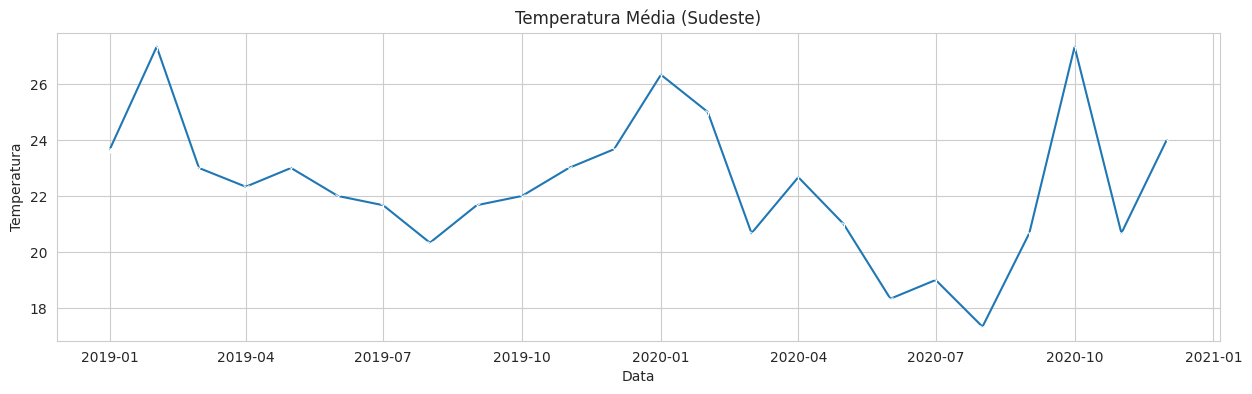

In [60]:
# resposta da questão 3.1.a
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=temperatura, x='referencia', y='temp-media', marker='1')
  grafico.set(title='Temperatura Média (Sudeste)', ylabel='Temperatura', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)

 - **b.** Gere um gráfico de linha para a série temporal do consumo de energia **residencial**.

In [61]:
energia.head()

,residencial,industrial,comercial
referencia,,,
2019-01-01,6389714,7545071,4370412
2019-02-01,6188834,7285407,4365504
2019-03-01,6072327,7556147,4303463
2019-04-01,5610278,7494816,4115920
2019-05-01,5785412,7597072,4141319


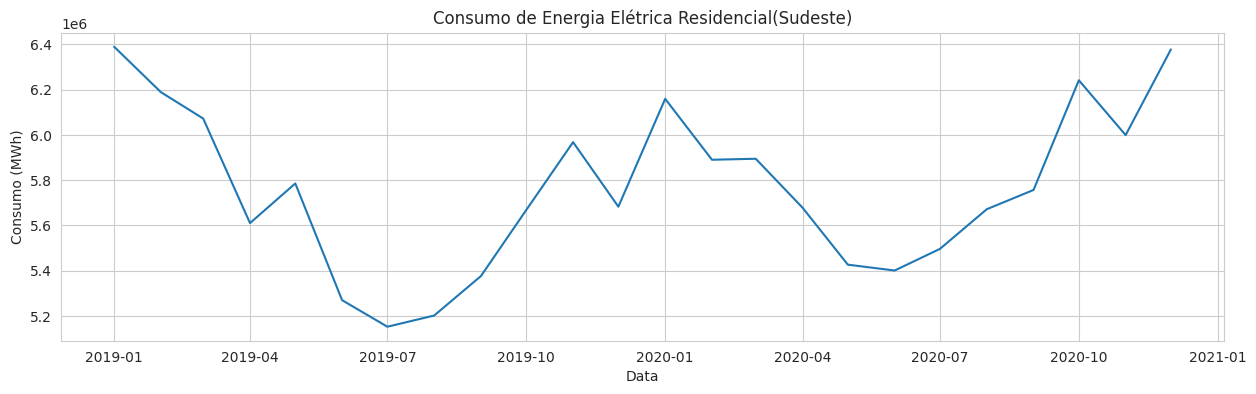

In [62]:
# resposta da questão 3.1.b
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='residencial', markers='1')
  grafico.set(title='Consumo de Energia Elétrica Residencial(Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)

 - **c.** Utilize o método `corrcoef` do pacote Numpy para calcular o coeficiente de Pearson entre o consumo de energia elétrica **residencial** e a **temperatura** média agregada `temp-media`.

In [64]:
# resposta da questão 3.1.c
correlacao_res = np.corrcoef(energia['residencial'], temperatura['temp-media'])

In [66]:
print(correlacao_res)

[[1.         0.62213419]
 [0.62213419 1.        ]]


 - **d.** Baseado nas respostas dos items anteriores, responda: A temperatura é um bom atributo para prever o consumo de energia elétrica **residencial**?

  - A temperatura apresenta uma correlação moderada de 0,62 com o consumo de energia elétrica residencial.

### **3.2. Consumo comercial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **comercial**.

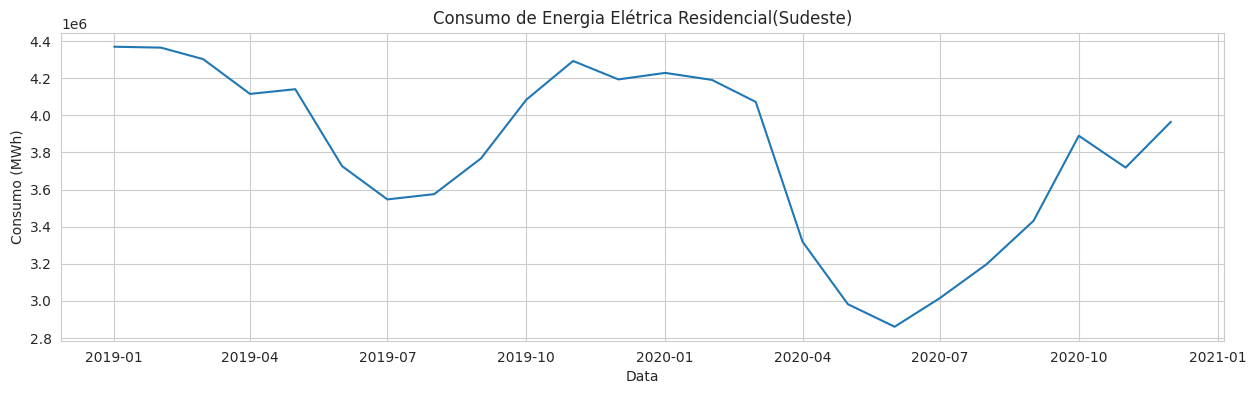

In [69]:
#gráfico comercial
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='comercial', markers='1')
  grafico.set(title='Consumo de Energia Elétrica Residencial(Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)

In [71]:
correlacao_com = np.corrcoef(energia['comercial'], temperatura['temp-media'])

In [72]:
print(correlacao_com)

[[1.         0.71788834]
 [0.71788834 1.        ]]


- A temperatura é um bom atributo para prever o consumo de energia elétrica **comercial**?

 - A temperatura apresenta uma correlação forte de 0,72 com o consumo de energia elétrica comercial.

### **3.3. Consumo industrial**

Repita o exercício 3.1. para dados de consumo de energia elétrica **industrial**.

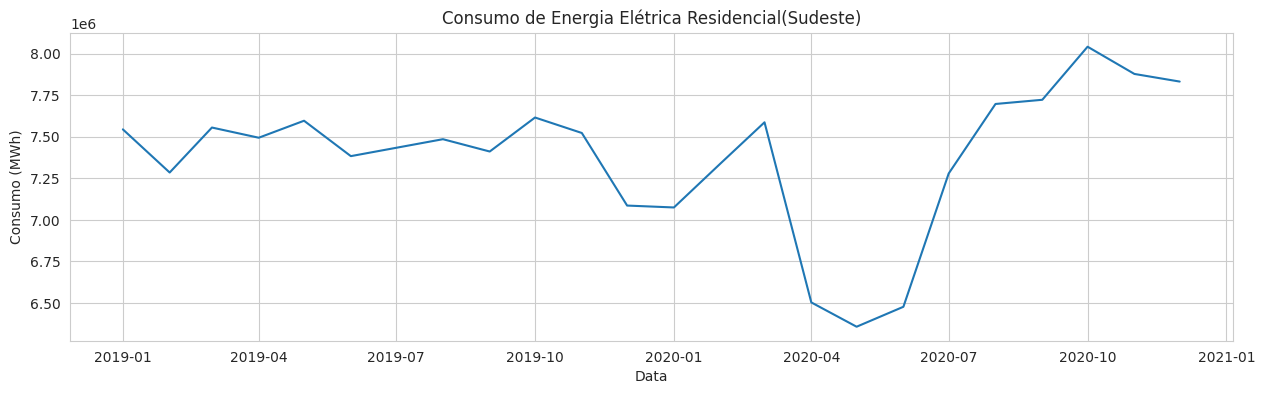

In [73]:
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=energia, x='referencia', y='industrial', markers='1')
  grafico.set(title='Consumo de Energia Elétrica Residencial(Sudeste)', ylabel='Consumo (MWh)', xlabel='Data');
  grafico.figure.set_size_inches(15, 4)

In [75]:
correlacao_ind = np.corrcoef(energia['industrial'], temperatura['temp-media'])

In [76]:
print(correlacao_ind)

[[1.         0.15180277]
 [0.15180277 1.        ]]


- A temperatura é um bom atributo para prever o consumo de energia elétrica **comercial**?

 - A temperatura apresenta uma correlação muito fraca de 0,15 com o consumo de energia elétrica industrial, indicando uma associação praticamente inexistente entre as duas variáveis.

---